In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\kqe27\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\kqe27\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [8]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6072 - accuracy: 0.6632 - val_loss: 0.4362 - val_accuracy: 0.8321
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3582 - accuracy: 0.8938 - val_loss: 0.3240 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2357 - accuracy: 0.9381 - val_loss: 0.2984 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1818 - accuracy: 0.9439 - val_loss: 0.2848 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1411 - accuracy: 0.9608 - val_loss: 0.2922 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1076 - accuracy: 0.9721 - val_loss: 0.3258 - val_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0922 - accuracy: 0.9772 - val_loss: 0.4123 - val_accuracy: 0.8594
Epoch 8/20
30

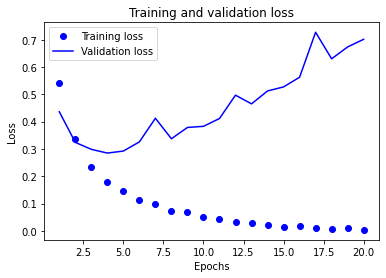

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
# epochs = range(1, len(accuracy) + 1)
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

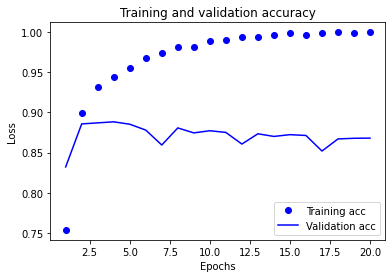

In [10]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 11ms/step - loss: 0.5830 - accuracy: 0.7089
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2988 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2152 - accuracy: 0.9257
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2901 - accuracy: 0.8860: 0s - loss: 0.297
